In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow.keras import layers

In [2]:
train_dataset,info = tfds.load('horses_or_humans', with_info = True, split='train', as_supervised=True)
val_dataset,val_info = tfds.load("horses_or_humans", with_info=True, split='test', as_supervised=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete1B9S66/horses_or_humans-train.tfrecord


  0%|          | 0/1027 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/horses_or_humans/3.0.0.incomplete1B9S66/horses_or_humans-test.tfrecord


  0%|          | 0/256 [00:00<?, ? examples/s]

Dataset horses_or_humans downloaded and prepared to /root/tensorflow_datasets/horses_or_humans/3.0.0. Subsequent calls will reuse this data.


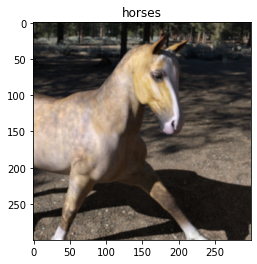

In [3]:
get_label_name = info.features["label"].int2str
image, label = next(iter(train_dataset))
_ = plt.imshow(image)
_ = plt.title(get_label_name(label))

In [4]:
IMG_SIZE = 220
resize_and_rescale = tf.keras.Sequential([
            layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE, input_shape=[300,300,3]),
            layers.experimental.preprocessing.Rescaling(1./255)
])

In [ ]:
result  = resize_and_rescale(image)
plt.imshow(result)
print("Image Dimensions were: {0}x{1}".format(image.shape[0], image.shape[1]))
print("Resized Image Dimensions are: {0}x{1}".format(result.shape[0], result.shape[1]))
print()
print(f"Checking the values for Resulted image pixels: MIN -->{result.numpy().min():.4f}, MAX --> {result.numpy().max():.4f}")

In [ ]:
## Heavier Augmentation
data_augmentation = tf.keras.Sequential([
                            layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
                            layers.experimental.preprocessing.RandomRotation((-0.2, 0.3))
])

In [ ]:
print(image.shape)
image = tf.expand_dims(image, 0)
print(image.shape)

In [ ]:
plt.figure(figsize = (10,10))
for i in range(9):
  augmented_image = data_augmentation(image)
  ax = plt.subplot(3,3,i+1)
  plt.imshow(augmented_image[0])
  plt.axis("off")

In [ ]:
train_dataset = train_dataset.shuffle(100).batch(8)
val_dataset = val_dataset.batch(8)

In [ ]:
model = tf.keras.models.Sequential([
                                   resize_and_rescale,
                                   data_augmentation,
                                   tf.keras.layers.Conv2D(filters=8, kernel_size = 3, activation='relu', padding='same'),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Conv2D(filters = 16, kernel_size = 3, activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(),
                                    tf.keras.layers.Conv2D(filters = 32, kernel_size = 3, activation = 'relu'),
                                   tf.keras.layers.MaxPooling2D(),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(units=64, activation = 'relu'),
                                   tf.keras.layers.Dense(units = 2, activation='softmax')
])
model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss="sparse_categorical_crossentropy", optimizer=RMSprop(learning_rate=0.001), metrics=['accuracy'])
history = model.fit(train_dataset, epochs=5, validation_data=val_dataset)

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(5), history.history['loss'], 'r', label='training loss')
plt.plot(range(5), history.history['val_loss'], 'b', label='validation Loss')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Loss")
plt.show()

In [ ]:
plt.figure(figsize=(8, 4))
plt.plot(range(5), history.history['accuracy'], 'r', label='training accuracy')
plt.plot(range(5), history.history['val_accuracy'], 'b', label='validation accuracy')
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel("Accuracy")
plt.show()